In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy import stats

In [102]:
test1 = pd.read_csv('../Data/Test1.csv', index_col=0)
test2 = pd.read_csv('../Data/Test2.csv', index_col=0)
test4 = pd.read_csv('../Data/Test4.csv', index_col=0)
data = pd.concat([test1, test2, test4])
data.head()

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
t,,,,,,,,,,,,,,,,,,
1636579517,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2023,-179.8798,22.3221,783.1761,-772.5771,-2.326357,9.639795,-32.645949,11.805614,18.656085,-12.831012
1636579518,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.192611,9.531656,-33.073905,11.697159,18.462518,-12.250218
1636579519,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.103594,9.776526,-31.435784,11.662171,18.601191,-11.455588
1636579520,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-1.869649,9.100982,-31.719140,11.414681,18.489816,-12.538161
1636579521,-4.9511,0.0183,-0.0719,213.6337,324.1015,895.3528,-154.9772,0.2024,-179.8798,22.3204,783.1754,-772.5771,-2.336206,9.058406,-32.329481,11.223285,17.952984,-10.425429


In [103]:
data.shape

(69239, 18)

In [104]:
def trisurf_plot(xR1, yR1, zR1, xR2, yR2, zR2, title):
    fig = plt.figure()
    
    ax1 = fig.add_subplot(121,projection='3d')
    surf1 = ax1.plot_trisurf(xR1, yR1, zR1, cmap=cm.jet, linewidth=0.1)
    ax1.set_xlabel('R1 x')
    ax1.set_ylabel('R1 y')
    ax1.set_zlabel('R1 z')

    ax2 = fig.add_subplot(122,projection='3d')
    surf2 = ax2.plot_trisurf(xR2, yR2, zR2, cmap=cm.jet,linewidth=0.1)
    ax2.set_xlabel('R2 x')
    ax2.set_ylabel('R2 y')
    ax2.set_zlabel('R2 z')

    #plt.colorbar(surf2, shrink=0.5, aspect=5)  
    ax.set_title(title)
    plt.show()

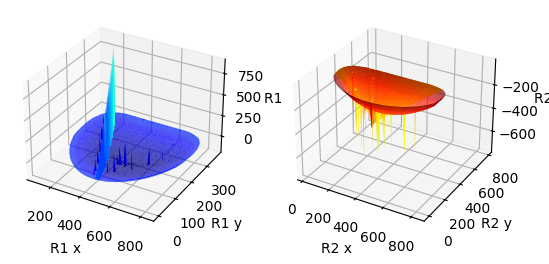

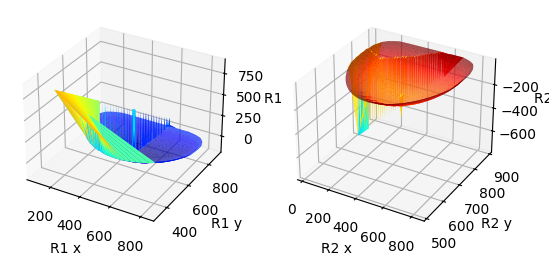

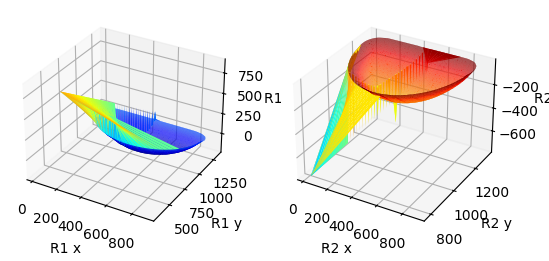

In [105]:
trisurf_plot(test1['x_enc_1'], test1['y_enc_1'], test1['z_enc_1'],
             test1['x_enc_2'], test1['y_enc_2'], test1['z_enc_2'], 'Test 1')
trisurf_plot(test2['x_enc_1'], test2['y_enc_1'], test2['z_enc_1'], 
             test2['x_enc_2'], test2['y_enc_2'], test2['z_enc_2'], 'Test 2')
trisurf_plot(test4['x_enc_1'], test4['y_enc_1'], test4['z_enc_1'], 
             test4['x_enc_2'], test4['y_enc_2'], test4['z_enc_2'], 'Test 4')

In [106]:
# Min-Max Scaling
def minmaxscale(x):
    return (x - min(x)) / (max(x) - min(x))

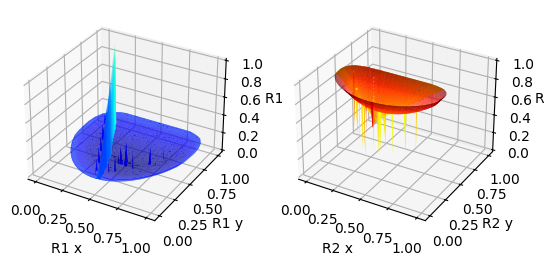

In [ ]:
trisurf_plot(minmaxscale(test1['x_enc_1']), minmaxscale(test1['y_enc_1']), minmaxscale(test1['z_enc_1']),
             minmaxscale(test1['x_enc_2']), minmaxscale(test1['y_enc_2']), minmaxscale(test1['z_enc_2']), 'Test 1')

trisurf_plot(minmaxscale(test2['x_enc_1']), minmaxscale(test2['y_enc_1']), minmaxscale(test2['z_enc_1']),
             minmaxscale(test2['x_enc_2']), minmaxscale(test2['y_enc_2']), minmaxscale(test2['z_enc_2']), 'Test 2')

trisurf_plot(minmaxscale(test4['x_enc_1']), minmaxscale(test4['y_enc_1']), minmaxscale(test4['z_enc_1']),
             minmaxscale(test4['x_enc_2']), minmaxscale(test4['y_enc_2']), minmaxscale(test4['z_enc_2']), 'Test 4')

In [99]:
# removing outliers 
z = np.abs(stats.zscore(test1['z_enc_1']))

threshold = 3
outliers = test1[z > threshold]

test1.loc[z > threshold, 'z_enc_1'] = test1['z_enc_1'].median()
test1.head()

,a_enc_1,b_enc_1,c_enc_1,x_enc_1,y_enc_1,z_enc_1,a_enc_2,b_enc_2,c_enc_2,x_enc_2,y_enc_2,z_enc_2,fx_1,fy_1,fz_1,fx_2,fy_2,fz_2
t,,,,,,,,,,,,,,,,,,
1636579709,-75.555222,-0.005665,-0.012077,441.232064,54.251726,-69.768683,109.529686,0.045365,179.987335,408.750687,130.225785,-299.260277,9.281464,-6.123108,-35.308015,3.785653,-2.593159,-15.365679
1636579710,-77.543125,-0.004871,-0.011093,447.642365,46.653517,-69.768683,106.860228,0.038007,179.988429,419.570914,111.956850,-286.021608,8.603435,-4.983468,-36.227301,3.069686,-2.596856,-15.705798
1636579711,-79.509707,-0.004236,-0.008878,453.988985,39.141038,-69.768683,104.180845,0.032664,179.989793,430.412736,93.659927,-272.732902,8.184165,-3.493669,-35.886831,1.776177,-3.148081,-16.229803
1636579712,-81.474995,-0.003292,-0.006564,460.329424,31.635761,-69.768683,101.522879,0.025992,179.991008,441.173169,75.480513,-259.551068,8.435448,-5.226699,-36.088291,1.102295,-3.105719,-13.288076
1636579713,-83.465984,-0.003600,-0.005083,466.726992,24.001929,-69.768683,98.852227,0.019892,179.993136,451.981764,57.214378,-246.309507,8.356964,-5.123134,-36.917221,2.178914,-2.859558,-13.814964
